<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

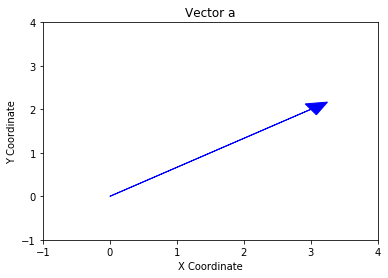

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

a = [3, 2]
plt.axis([-1,4,-1,4])
plt.arrow(0,0, a[0], a[1], head_width=.3, head_length=.3, color = 'b')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Vector a')
plt.show();


plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
b = [17, -4, -2, 1]
print ('norm b =', np.linalg.norm(b))
print("Norm of a vector represents the magnitude of the vector")

norm b = 17.60681686165901
Norm of a vector represents the magnitude of the vector


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
print ('cd =', np.dot(c,d))

cd = 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [54]:
E = np.array([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]])
print ('E^-1:')
print(np.linalg.inv(E))
print("------------")
print ('E^T:')
print(np.transpose(E))

E^-1:
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
------------
E^T:
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [7]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [10]:
def mean_variance_standard_deviation(items):
  length=len(items)
  mean = sum(items) / length
  difference = [i - mean for i in items]
  sqdifference = [i ** 2 for i in difference]
  variance = sum(sqdifference)/(length-1) # dof n-1 for samples
  stdev = variance ** 0.5
  return  mean, variance, stdev


for i in ["customers","snow"]:
  print(i+" stats")
  print("The Mean is:",mean_variance_standard_deviation(df[i])[0])
  print("The Variance is:",mean_variance_standard_deviation(df[i])[1])
  print("The Standard Deviation is:",mean_variance_standard_deviation(df[i])[2])
  print("------Numpy Method------")
  print("The Numpy Mean is:",np.mean(df[i]))
  print("The Numpy variance is:",np.var(df[i],ddof=1))
  print("The Numpy Standard Deviation is:",np.std(df[i],ddof=1))
  print("------Pandas Method------")
  print("The Panda Mean is:",df[i].describe()['mean'])
  print("The Panda variance is:",df[i].var())
  print("The Panda Standard Deviation is:",df[i].describe()['std'])
  print("")

customers stats
The Mean is: 1135.7142857142858
The Variance is: 98761.90476190478
The Standard Deviation is: 314.26406851866597
------Numpy Method------
The Numpy Mean is: 1135.7142857142858
The Numpy variance is: 98761.90476190478
The Numpy Standard Deviation is: 314.26406851866597
------Pandas Method------
The Panda Mean is: 1135.7142857142858
The Panda variance is: 98761.90476190478
The Panda Standard Deviation is: 314.26406851866597

snow stats
The Mean is: 2.7142857142857144
The Variance is: 8.571428571428571
The Standard Deviation is: 2.9277002188455996
------Numpy Method------
The Numpy Mean is: 2.7142857142857144
The Numpy variance is: 8.571428571428571
The Numpy Standard Deviation is: 2.9277002188455996
------Pandas Method------
The Panda Mean is: 2.7142857142857144
The Panda variance is: 8.571428571428571
The Panda Standard Deviation is: 2.9277002188455996



## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The number of customers variance is not comparable to the inches of snow variance since they use two different units of measurments, but you can compare there relationship with there covariance.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [11]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [35]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [36]:
print("Dataframe Shape:"), print(df.shape), print("")
print("Dataframe Columns:"), print(df.columns), print("")
print("Dataframe Dtypes:"), print(df.dtypes), print("")
print("Dataframe Head():"), print(df.head()), print("")
print("Dataframe Isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
print("Dataframe Isnull().sum():"), print(df.isnull().sum()), print("")
print("Dataframe Correlation():"), print(df.corr()), print("")
print("Dataframe Describe(include='all'):"), print(df.describe(include='all')), print("")

Dataframe Shape:
(4, 18)

Dataframe Columns:
Index(['Country', 'Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

Dataframe Dtypes:
Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

Dataframe Head():
         Country  Cheese  Carcass_Meat  Other_Meat  Fish  Fats_and_Oil

(None, None, None)

In [37]:
df = df.drop('Country', axis=1)
df = df.astype(float)
scaler = StandardScaler()
columns = df.columns.values

df_scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(df_scale, columns=columns)
print(df.head())
print(df_scale.head())

   Cheese  Carcass_Meat  Other_Meat   Fish  Fats_and_Oils  Sugars  \
0   105.0         245.0       685.0  147.0          193.0   156.0   
1   103.0         227.0       803.0  160.0          235.0   175.0   
2   103.0         242.0       750.0  122.0          184.0   147.0   
3    66.0         267.0       586.0   93.0          209.0   139.0   

   Fresh_Potatoes  Fresh_Veg  Other_Veg  Processed_Potatoes  Processed_Veg  \
0           720.0      253.0      488.0               198.0          360.0   
1           874.0      265.0      570.0               203.0          365.0   
2           566.0      171.0      418.0               220.0          337.0   
3          1033.0      143.0      355.0               187.0          334.0   

   Fresh_Fruit  Cereals  Beverages  Soft_Drinks  Alcoholic Drinks  \
0       1102.0   1472.0       57.0       1374.0             375.0   
1       1137.0   1582.0       73.0       1256.0             475.0   
2        957.0   1462.0       53.0       1572.0         

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>


 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]
------------


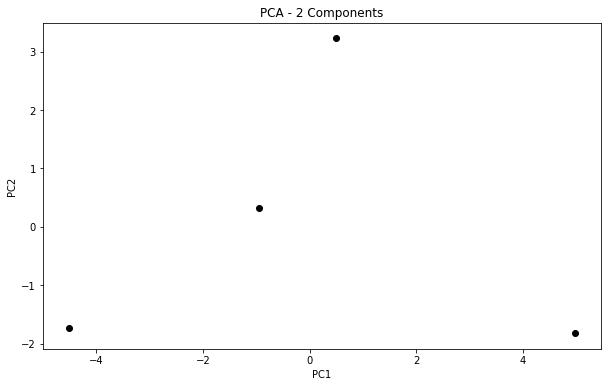

In [38]:
pca = PCA(2)
pca.fit(df_scale)
B = pca.transform(df_scale)
print("\n Projected Data: \n", B)
print("------------")
dfB = pd.DataFrame(B, columns=['PC1', 'PC2'])
plt.subplots(figsize=(10,6))
plt.scatter(dfB['PC1'], dfB['PC2'], c='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2 Components')
plt.show();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [39]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [40]:
print("Points Shape:"), print(points.shape), print("")
print("Points Columns:"), print(points.columns), print("")
print("Points Dtypes:"), print(points.dtypes), print("")
print("Points Sample(7):"), print(points.sample(7)), print("")
print("Points Isnull().sum().sum():"), print(points.isnull().sum().sum()), print("")
print("Points Isnull().sum():"), print(points.isnull().sum()), print("")
print("Points Describe(include='all'):"), print(points.describe(include='all')), print("")

Points Shape:
(200, 2)

Points Columns:
Index(['x', 'y'], dtype='object')

Points Dtypes:
x    float64
y    float64
dtype: object

Points Sample(7):
            x         y
49   0.050259 -8.965132
78  -2.093325  3.991943
154 -4.353718 -9.175721
133 -9.408878 -2.812304
90  -2.696244  3.789418
109  5.864389  4.651550
9   -5.711709 -6.802013

Points Isnull().sum().sum():
0

Points Isnull().sum():
x    0
y    0
dtype: int64

Points Describe(include='all'):
                x           y
count  200.000000  200.000000
mean    -2.323298   -3.422869
std      4.556513    5.580888
min    -10.118473  -11.095795
25%     -4.619520   -8.246848
50%     -3.373794   -5.307697
75%     -0.427175    3.360028
max      7.807885    5.883054



(None, None, None)

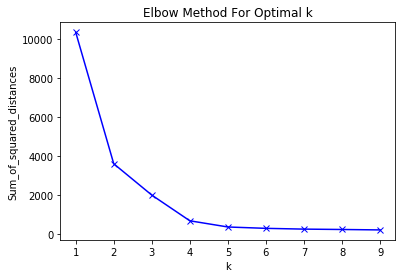

In [56]:
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

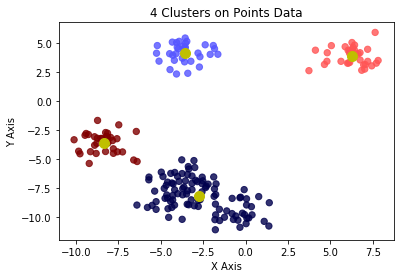

In [52]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
points_kmeans = kmeans.predict(points)
plt.scatter(points.x, points.y, c=points_kmeans, s=40, alpha=.8, 
            cmap = 'seismic')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='y', s=100);
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title("4 Clusters on Points Data")
plt.show();

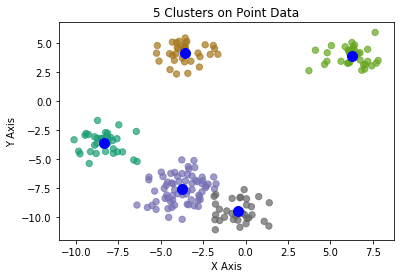

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
points_kmeans = kmeans.predict(points)
plt.scatter(points.x, points.y, c=points_kmeans, s=40, alpha=.7, 
            cmap = 'Dark2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='b', s=100);
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title("5 Clusters on Point Data")
plt.show();